In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [143]:
df = pd.read_csv("ClimateData.csv")
metadata = pd.read_csv("Metadata.csv")

In [144]:
metadata

,id,building id
0,building_class,building classification
1,floor_area,floor area (in square feet) of the building
2,year_built,year in which the building was constructed
3,precipitation_inches,annual precipitation in inches at the location...
4,snowfall_inches,annual snowfall in inches at the location of t...
5,avg_temp,average temperature over a year at the locatio...
6,days_with_fog,number of days with fog at the location of the...
7,eui,Site Energy Usage Intensity is the amount of h...


In [145]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [146]:
df.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


## 1. Please take a look at the data types and summary of our variables.

In [147]:
df.dtypes

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object

## 2. Summarize the number of unique values in each column.

In [148]:
for i in list(df_numerical.columns):
    print(i + ' # of Unique Values: {}'.format(len(pd.unique(df[i]))))

floor_area # of Unique Values: 20433
year_built # of Unique Values: 181
precipitation_inches # of Unique Values: 171
snowfall_inches # of Unique Values: 71
avg_temp # of Unique Values: 173
days_with_fog # of Unique Values: 43
site_eui # of Unique Values: 17203


## 3. Check at descriptive statistics for the Dataset


In [149]:
df_numerical = df.drop(['building_class'], axis = 1)
df_numerical

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...
75752,75752,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [150]:
for i in list(df_numerical.columns):
    print(df_numerical[i].describe())


count    75757.000000
mean     37878.000000
std      21869.306509
min          0.000000
25%      18939.000000
50%      37878.000000
75%      56817.000000
max      75756.000000
Name: id, dtype: float64
count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64
count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64
count    75757.000000
mean        42.430651
std         10.592205
min          0.000000
25%         39.350000
50%         42.170000
75%         46.320000
max        107.690000
Name: precipitation_inches, dtype: float64
count    75757.000000
mean        29.136379
std         17.810894
min          0.000000
25%          9.600000
50%         31.600000
75%         49.100000
max     

In [151]:
df['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

## 4. Check the number of missing values.

In [152]:
df_missing = df.isnull()

In [153]:
df_missing.sum()

id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64

## 5. Take care of missing data. You can decide to remove or use the imputation

In [154]:
df['days_with_fog'].mean()

109.14205133340009

In [155]:
df['year_built'].mode()

0    1927.0
dtype: float64

In [156]:
df_new=df.fillna(method = 'ffill', axis = 0)

In [157]:
df_new['days_with_fog'][0]

nan

In [158]:
df['days_with_fog'].fillna(method = 'ffill')

0          NaN
1         12.0
2         12.0
3         12.0
4         12.0
         ...  
75752    261.0
75753    261.0
75754    261.0
75755    261.0
75756    261.0
Name: days_with_fog, Length: 75757, dtype: float64

In [159]:
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02


In [160]:
df['days_with_fog'] = df['days_with_fog'].fillna(method = 'ffill')

In [161]:
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,12.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,261.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,261.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,261.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,261.0,592.02


In [162]:
df['days_with_fog'] = df['days_with_fog'].fillna(12)

In [163]:
df['year_built'] = df['year_built'].fillna(df['year_built'].mode())

In [164]:
df

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,12.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,12.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,261.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,261.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,261.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,261.0,592.02


## 6. Find and remove duplicate variables

In [165]:
df = df.drop(['id'], axis = 1)
df

,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,12.0,248.68
1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,12.0,3.90
...,...,...,...,...,...,...,...,...
75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,261.0,132.92
75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,261.0,39.48
75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,261.0,48.40
75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,261.0,592.02


## 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [166]:
df = pd.get_dummies(df, sparse=True)
df

,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui,building_class_Commercial,building_class_Residential
0,61242.0,1942.0,16.59,0.0,56.972603,12.0,248.68,1,0
1,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50,1,0
2,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69,1,0
3,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41,1,0
4,66000.0,1985.0,16.59,0.0,56.972603,12.0,3.90,1,0
...,...,...,...,...,...,...,...,...,...
75752,20410.0,1995.0,45.03,1.4,55.147541,261.0,132.92,1,0
75753,40489.0,1910.0,45.03,1.4,55.147541,261.0,39.48,0,1
75754,28072.0,1917.0,106.32,36.6,47.911202,261.0,48.40,1,0
75755,53575.0,2012.0,106.32,36.6,47.911202,261.0,592.02,1,0


## 8. Create the boxplot and show the outlier.

In [168]:
col_names = list(df_numerical.columns)

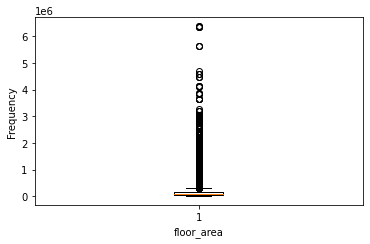

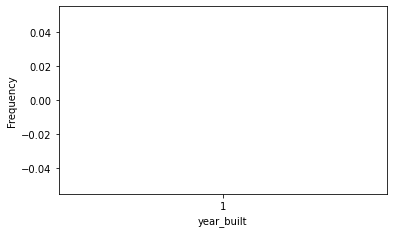

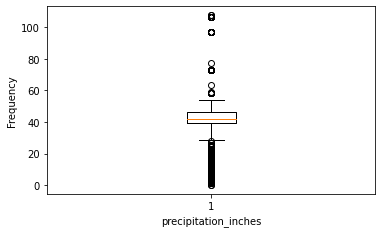

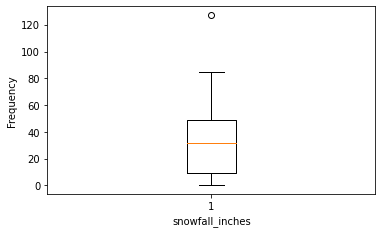

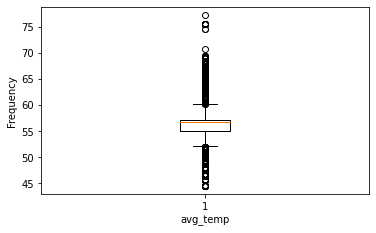

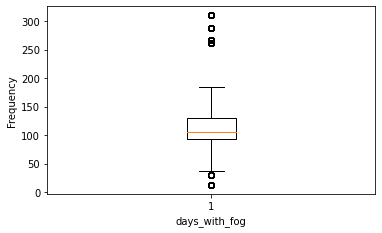

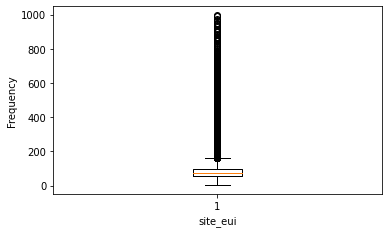

In [171]:
for i,feature_name in enumerate(col_names[1:8]):
    plt.figure(figsize=(20,20))
    plt.subplot(5,3,i+2)
    plt.boxplot(df[feature_name])
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show() 

## 9. Create the histogram and check the outliers

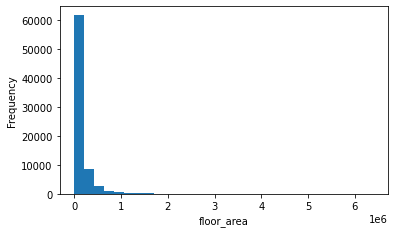

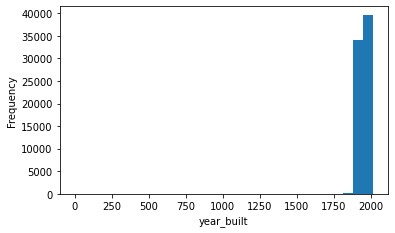

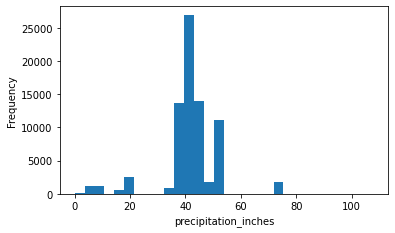

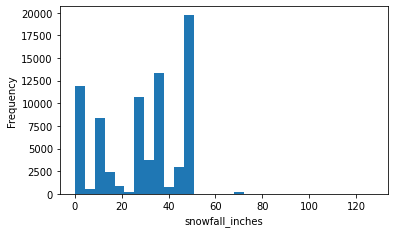

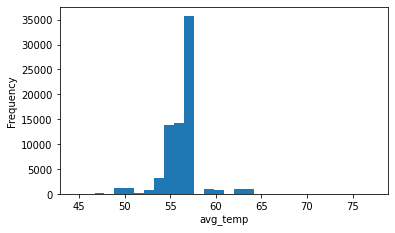

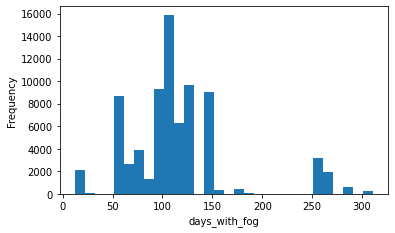

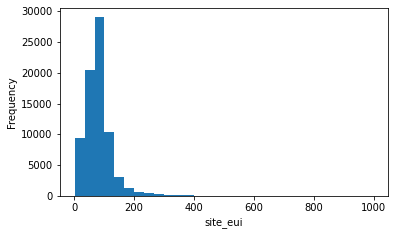

In [172]:
for i,feature_name in enumerate(col_names[1:8]):
    plt.figure(figsize=(20,20))
    plt.subplot(5,3,i+2)
    plt.hist(df[feature_name], bins = 30)
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.show()

## 10. If feature scaling is needed, do it, please.

In [173]:
df_numerical = df.drop(['building_class_Residential','building_class_Commercial'], axis = 1)

In [174]:
df_numerical

,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,61242.0,1942.0,16.59,0.0,56.972603,12.0,248.68
1,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,66000.0,1985.0,16.59,0.0,56.972603,12.0,3.90
...,...,...,...,...,...,...,...
75752,20410.0,1995.0,45.03,1.4,55.147541,261.0,132.92
75753,40489.0,1910.0,45.03,1.4,55.147541,261.0,39.48
75754,28072.0,1917.0,106.32,36.6,47.911202,261.0,48.40
75755,53575.0,2012.0,106.32,36.6,47.911202,261.0,592.02


In [175]:
x = df.values

In [88]:
scaler = StandardScaler()

(array([6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.0000e+00, 2.0000e+01, 7.3888e+04]),
 array([-52.6890496 , -47.25094751, -41.81284542, -36.37474333,
        -30.93664124, -25.49853915, -20.06043706, -14.62233497,
         -9.18423288,  -3.74613079,   1.6919713 ]),
 <BarContainer object of 10 artists>)

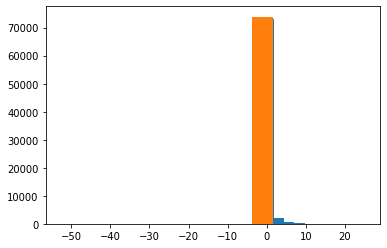

In [186]:
x_std = scaler.fit_transform(x)

plt.hist(x_std[:,0])
plt.hist(x_std[:,1])